##### Đọc dữ liệu:

In [37]:
import pandas as pd

names = ['code number', 'Class', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
df = pd.read_csv('datacum', names=names, comment='#', skip_blank_lines=True, skipinitialspace=True)
df

,code number,Class,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,1000025,2,5,1,1,1,2,1,3,1,1
1,1002945,2,5,4,4,5,7,10,3,2,1
2,1015425,2,3,1,1,1,2,2,3,1,1
3,1016277,2,6,8,8,1,3,4,3,7,1
4,1017023,2,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,2,3,1,1,1,3,2,1,1,1
695,841769,2,2,1,1,1,2,1,1,1,1
696,888820,4,5,10,10,3,7,3,8,10,2
697,897471,4,4,8,6,4,3,4,10,6,1


##### Train test split:

In [39]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành 2 phần là benign và malignant
bengin = df[df['Class'] == 2]
malignant = df[df['Class'] == 4]

# Chia train test, trên từng loại: bengin có 80 bản ghi test, malignant có 40 bản ghi test
bengin_train, bengin_test =  train_test_split(bengin, test_size=80, random_state=43)
malignant_train, malignant_test = train_test_split(malignant, test_size=40, random_state=43)

# Gộp 2 loại lại để tạo train set và test set
train_set = pd.concat([bengin_train, malignant_train])
test_set = pd.concat([bengin_test, malignant_test])

##### Train model:

In [40]:
from sklearn.naive_bayes import GaussianNB

# Tách đặc trưng và nhãn
y_train = train_set['Class']
X_train = train_set.drop(['code number', 'Class'], axis=1)
y_test = test_set['Class']
X_test = test_set.drop(['code number', 'Class'], axis=1)

# Huấn luyện mô hình
clf = GaussianNB()
clf.fit(X_train, y_train)

# Dự đoán
output = clf.predict(X_test)

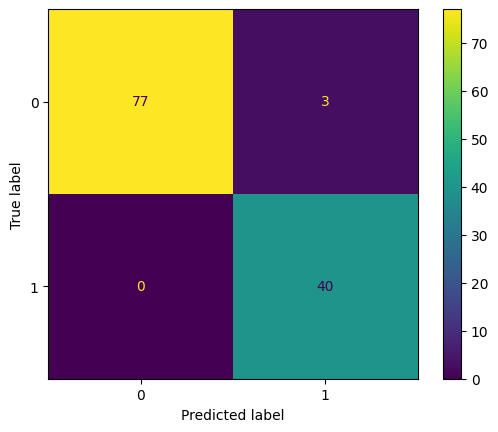

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Độ chính xác
accuracy = accuracy_score(y_test, output)
# Precision
bengin_precision = precision_score(y_test, output, pos_label=2)
malignant_precision = precision_score(y_test, output, pos_label=4)
# Recall
bengin_recall = recall_score(y_test, output, pos_label=2)
malignant_recall = recall_score(y_test, output, pos_label=4)

cm = confusion_matrix(y_test, output, labels=[2, 4])
ConfusionMatrixDisplay(cm).plot()

In [69]:
print(f'Accuracy: {accuracy}')
print(f'Precision of Bengin: {precision}')
print(f'Recall of Bengin: {recall}')
print(f'Precision of Malignant: {malignant_precision}')
print(f'Recall of Malignant: {malignant_recall}')

Accuracy: 0.975
Precision of Bengin: 1.0
Recall of Bengin: 0.9625
Precision of Malignant: 0.9302325581395349
Recall of Malignant: 1.0
